___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


# Load the dataset

In [5]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [6]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'string',
}

In [7]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [8]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 15s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
728680,01,7,UA,AUS,ORD,17,14,11,0,20,4,30.26,49.0,0.0,43.0,CLR,10.00,0.0,0.0,30.420,6.0,0.0,60.0,SCT,10.00,0.0,11.0
6690617,01,3,OH,CLT,PIA,20,21,4,0,21,3,30.22,47.0,0.0,56.0,SCT,10.00,0.0,7.0,30.205,32.0,0.0,88.0,(missing),3.73,0.0,7.0
1571914,07,4,WN,OAK,LAX,19,11,7,0,20,2,29.95,61.0,0.0,78.0,SCT,10.00,0.0,11.0,29.930,72.0,0.0,64.0,CLR,10.00,0.0,7.0
6519909,08,5,F9,PHX,DEN,19,13,10,0,22,3,29.74,103.0,0.0,19.0,SCT,10.00,0.0,9.0,30.180,65.0,0.0,68.0,CLR,10.00,0.0,11.0
505216,05,4,AA,GEG,DFW,13,13,12,1,19,6,29.87,74.0,0.0,21.0,(missing),9.94,0.0,16.0,29.900,83.0,0.0,65.0,FEW,10.00,24.0,13.0


___

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

## Correlation Heatmap

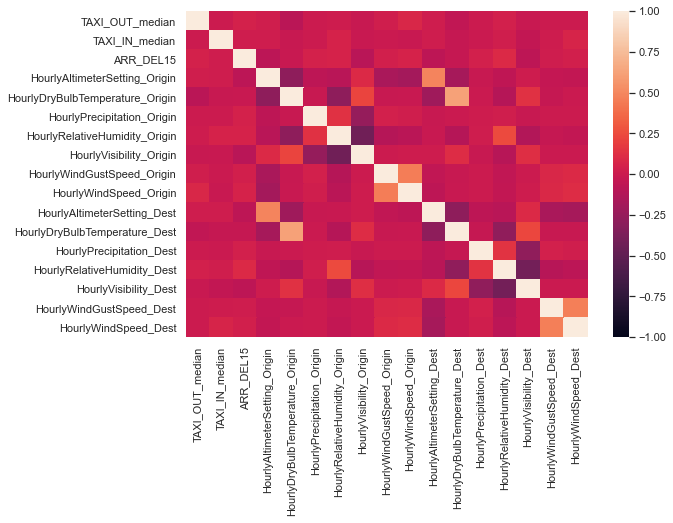

In [10]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

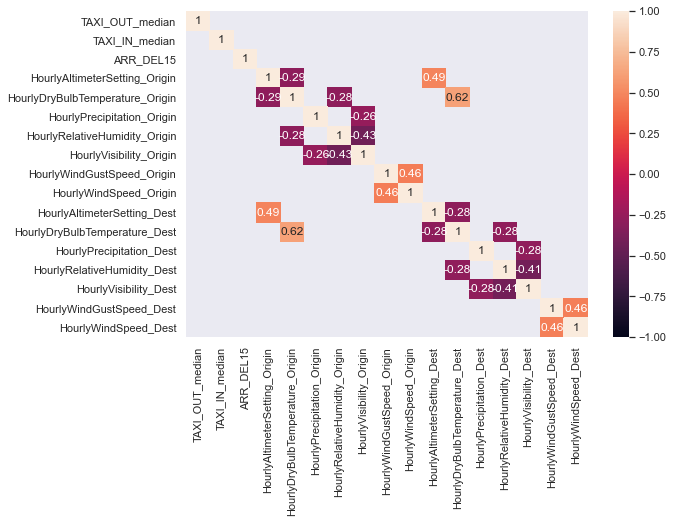

In [11]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## 2. Dataset overview

In [12]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

In [14]:
# For the initial runs, define a reasonably-sized sample:
sample_length = len(df_all) # int(1e5)

# # The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
# delayed = df[df['ARR_DEL15'] == 1].sample(sample_length // 2)
# ontime = df[df['ARR_DEL15'] == 0].sample(sample_length // 2)
# df = delayed.append(ontime)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights: 5824288 (80.89%)
Delayed flights: 1375765 (19.11%)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200053 entries, 3046636 to 4500015
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  Ho

### Train / Test split
Break the dataset into three blocks:
1. Training (80%) → cross-validation
2. Test (20%) → final evaluation

In [16]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5760042, 26), (1440011, 26), (5760042,), (1440011,))

In [17]:
def otp_describe(y):
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y[y == 0]), 100*len(y[y == 0])/len(y)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y[y == 1]), 100*len(y[y == 1])/len(y)))

In [18]:
print("TRAIN:")
otp_describe(y_train)
print("TEST:")
otp_describe(y_test)

TRAIN:
On-time flights: 4659528 (80.89%)
Delayed flights: 1100514 (19.11%)
TEST:
On-time flights: 1164760 (80.89%)
Delayed flights:  275251 (19.11%)


# Preprocessing

## Target Encoding
- Fit-transform on Training dataset
- Transform on Test dataset

In [19]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [20]:
pd.set_option('mode.chained_assignment', None)

# Declare which features are going to be target-encoded:
te_features = X_train.select_dtypes(['string', 'category']).columns.to_list()
te_map = pd.DataFrame().append(X_train[te_features])

# Reformat so that the above 'calc_smooth_mean' function can work:
df_train = pd.concat([X_train, y_train], axis=1)
for cat_feature in te_features:
    df_train[cat_feature + '_te'] = calc_smooth_mean(df_train, cat_feature, 'ARR_DEL15', 500) # Generally default to 300
    te_map[cat_feature + '_te'] = df_train[cat_feature + '_te']
    
# Drop the target from the recently modified DF:
X_train = df_train.drop(te_features + ['ARR_DEL15'], axis=1)

# Define a dictionary comprised of dictionaries: keys are categorical features; values are dictionaries, original-coded pairs
te_map_dict = {}
for cat_col in te_features:
    te_map_cat_col = te_map[[cat_col, cat_col + '_te']].drop_duplicates([cat_col])
    te_map_cat_col = dict(zip(te_map_cat_col[cat_col], te_map_cat_col[cat_col + '_te']))
    te_map_dict[cat_col] = te_map_cat_col
    
# Define a mapper function to apply on Test dataset based on Training target-encoded values:
def te_mapper(te_dict, x):
    try:
        te_mapper = te_dict[x] # If airport appeared in Training dataset, apply the corresponding value
    except KeyError:
        te_mapper = np.median(list(te_dict.values())) # Otherwise, apply the median from the entire Training dataset
    return te_mapper

# Map the values using the 'te_mapper' function:
for cat_col in te_features:
    X_test[cat_col + '_te'] = X_test[cat_col].apply(lambda x: te_mapper(te_map_dict[cat_col], x))
# Drop the original features to harmonize format:
X_test.drop(te_features, axis=1, inplace=True)


# # On-hot encode the rest of the categorical variables:
# oh_features = X_train.select_dtypes(['string', 'category']).columns
# X_train = pd.get_dummies(X_train, columns=oh_features)
# X_test = pd.get_dummies(X_test, columns=oh_features)

pd.set_option('mode.chained_assignment', 'warn')

In [21]:
X_train

,TAXI_OUT_median,TAXI_IN_median,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest,MONTH_te,DAY_OF_WEEK_te,OP_UNIQUE_CARRIER_te,ORIGIN_te,DEST_te,DEP_TIME_hour_te,ARR_TIME_hour_te,DISTANCE_GROUP_te,HourlySkyConditions_Origin_te,HourlySkyConditions_Dest_te
4761494,16,6,29.86,85.0,0.0,17.0,9.94,0.0,11.0,29.98,66.0,0.0,75.0,10.00,0.0,3.0,0.247138,0.187216,0.144860,0.136903,0.161420,0.262006,0.256479,0.191851,0.194667,0.231885
2075742,9,4,29.99,52.0,0.0,83.0,10.00,0.0,10.0,30.01,50.0,0.0,86.0,9.94,0.0,3.0,0.166729,0.167093,0.175567,0.146369,0.155744,0.097276,0.093624,0.180930,0.231457,0.192195
6108871,13,6,30.16,61.0,0.0,16.0,10.00,0.0,9.0,30.32,55.0,0.0,49.0,10.00,0.0,7.0,0.185967,0.187216,0.213721,0.175673,0.259954,0.241851,0.230058,0.191851,0.162000,0.173846
6558338,17,5,30.18,58.0,0.0,75.0,10.00,0.0,6.0,30.32,23.0,0.0,78.0,10.00,0.0,7.0,0.185967,0.178967,0.211252,0.214391,0.223121,0.258355,0.256734,0.180930,0.231457,0.231885
4217632,17,8,29.89,33.0,0.0,96.0,4.00,0.0,7.0,30.22,42.0,0.0,53.0,10.00,0.0,10.0,0.231470,0.187216,0.144860,0.257002,0.269755,0.132944,0.137542,0.191851,0.231457,0.231885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771363,21,10,29.98,67.0,0.0,73.0,10.00,0.0,9.0,30.08,73.0,0.0,96.0,9.00,0.0,6.0,0.247138,0.167093,0.185157,0.173355,0.201614,0.258355,0.237436,0.199427,0.195088,0.163771
408432,8,8,30.08,82.0,0.0,72.0,10.00,0.0,14.0,29.99,53.0,0.0,77.0,8.70,0.0,5.0,0.205002,0.197726,0.144860,0.177135,0.141915,0.163670,0.159178,0.191851,0.179240,0.192195
3464872,9,6,29.92,89.0,0.0,59.0,10.00,0.0,10.0,30.28,77.0,0.0,50.0,10.00,26.0,21.0,0.210272,0.193615,0.175567,0.193867,0.197628,0.241851,0.238524,0.196832,0.195088,0.191375
5905834,16,5,30.45,35.0,0.0,37.0,10.00,0.0,6.0,30.33,41.0,0.0,49.0,10.00,23.0,14.0,0.142961,0.178967,0.210704,0.235812,0.192450,0.251195,0.251261,0.180930,0.195088,0.191375


In [22]:
X_test

,TAXI_OUT_median,TAXI_IN_median,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest,MONTH_te,DAY_OF_WEEK_te,OP_UNIQUE_CARRIER_te,ORIGIN_te,DEST_te,DEP_TIME_hour_te,ARR_TIME_hour_te,DISTANCE_GROUP_te,HourlySkyConditions_Origin_te,HourlySkyConditions_Dest_te
6735670,17,5,29.970,90.0,0.0,52.0,10.00,0.0,11.0,29.940,94.0,0.0,49.0,10.00,0.0,6.0,0.210272,0.187216,0.175434,0.157192,0.186670,0.241851,0.230058,0.177485,0.162000,0.173846
5676006,15,4,30.160,58.0,0.0,84.0,10.00,0.0,7.0,30.000,57.0,0.0,51.0,10.00,0.0,3.0,0.172232,0.193615,0.144860,0.157192,0.183618,0.132944,0.117425,0.197773,0.231457,0.191375
2431921,15,4,29.870,66.0,0.0,22.0,10.00,21.0,15.0,30.100,25.0,0.0,55.0,9.94,0.0,3.0,0.205002,0.193615,0.210704,0.175673,0.191115,0.192355,0.238524,0.197223,0.162000,0.192195
3326373,16,7,29.810,70.0,0.0,16.0,9.94,0.0,0.0,29.910,56.0,0.0,65.0,9.94,0.0,7.0,0.202809,0.193615,0.213721,0.228791,0.151806,0.251195,0.270233,0.207522,0.194667,0.192195
5414426,15,9,29.930,53.0,0.0,45.0,10.00,0.0,14.0,29.750,50.0,0.0,93.0,2.98,0.0,9.0,0.205002,0.199876,0.188211,0.198294,0.193562,0.225974,0.205323,0.177485,0.152069,0.192195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325436,15,12,29.850,95.0,0.0,15.0,10.00,0.0,9.0,29.940,80.0,0.0,47.0,9.94,0.0,10.0,0.202809,0.178967,0.210704,0.175673,0.204575,0.192355,0.238524,0.196832,0.162000,0.192195
5889406,12,4,30.160,51.0,0.0,54.0,9.94,0.0,9.0,29.980,64.0,0.0,90.0,10.00,0.0,8.0,0.166729,0.208553,0.175567,0.228791,0.193027,0.262006,0.237436,0.207522,0.194667,0.231885
1417147,19,11,29.480,68.0,0.0,90.0,6.84,0.0,7.0,30.010,70.0,0.0,46.0,10.00,0.0,8.0,0.247138,0.199876,0.213721,0.251379,0.225786,0.121120,0.112069,0.191851,0.194667,0.191375
5052114,16,6,30.300,50.0,0.0,74.0,10.00,0.0,5.0,30.385,38.0,0.0,70.0,9.94,0.0,0.0,0.172232,0.197726,0.210704,0.235812,0.190808,0.121120,0.128908,0.196832,0.162000,0.192195


## Preprocessing Pipeline

## PCA

### Habría que estudiar más el tema del PCA, pero ahora mismo, con un TargetEncoding, no parece ser muy útil reducir dimensionalidad, ya que el beneficio principalmente suele ser el tiempo, y en este caso no parece que redujéramos muchas dimensiones "poco útiles"

# Baseline model: `LogisticRegression`

### Cross-Fold Target Encoding
- To clamp down on the data leakage, we need to ensure that we’re not using the using the target value from a given sample to compute its target-encoded values
- Let’s create a transformer class to perform the cross-fold target encoding `TargetEncoderCV`
    - we may end up with NaNs (empty values) even when there were categories in the original dataframe
    - we can’t perform cross-fold encoding on our test data, because we don’t have any target values for which to compute the category means! → So, we have to use the category means from the training data in that case.
    ```python
    # Cross-fold Target encode the categorical data
    te = TargetEncoderCV()
    X_target_encoded_cv = te.fit_transform(X_train, y_train)
    X_target_encoded_cv.sample(10)
    
    # Compare category counts
    print('Original:')
    print(X_train.nunique())
    print('\nTarget encoded:')
    print(X_target_encoded_cv.nunique())
    ```
- We can fit the same model as before, but now using cross-fold target encoding:
    ```python
    # Regression model
    model_te_cv = Pipeline([
        ('encoder', TargetEncoderCV()),
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', BayesianRidge())
    ])

    # Cross-validated MAE
    scores = cross_val_score(model_te_cv, X_train, y_train, 
                             cv=3, scoring=mae_scorer)
    print('Cross-validated MAE: %0.3f +/- %0.3f'
          % (scores.mean(), scores.std()))
    ```

In [23]:
# LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_te_cv = Pipeline([
#     ('encoder', TargetEncoderCV()),
    ('regressor', LogisticRegression(C=0.1, max_iter=10000))
])

# Cross-validated 'f1'
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_te_cv, X_train, y_train, 
                         cv=3, scoring='recall')
print('Cross-validated PR-AUC: %0.3f +/- %0.3f'
      % (scores.mean(), scores.std()))

Cross-validated PR-AUC: 0.034 +/- 0.001


# XGBoost

In [24]:
from xgboost import XGBClassifier

`num_boost_round`: corresponds to the number of boosting rounds or trees to build
- Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter.
- You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.
- Fortunately XGBoost provides a nice way to find the best number of rounds whilst training.
- We can test our model at each step and see if adding a new tree/round improves performance.
- If performance haven’t improved for N rounds (N is defined by the variable `early_stopping_round`), we stop the training and keep the best number of boosting rounds.

In [25]:
# Summarize class distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(X_train), 100*len(X_train)/len(X_train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(X_train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(X_train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:      5760042 (100.00%)
On-time:            4659528 ( 80.89%)
Delayed:            1100514 ( 19.11%)
'scale_pos_weight' value:  4.23


[Soruce](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)  
Fine-tuning steps:
1. Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    - max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
    - min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
    - gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
    - subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
    - scale_pos_weight = 1: Because of high class imbalance.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. Lower the learning rate and decide the optimal parameters .

In [26]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                          booster='gbtree', tree_method='auto', num_boost_round = 10000, early_stopping_round=10,
                          scale_pos_weight=scale_pos_weight)

params = {
            'min_child_weight': [100, 150, 200],
            'gamma': [0.5],
            'subsample': [0.9],
            'colsample_bytree': [0.7],
            'max_depth': [6, 7, 8, 9],
            'learning_rate': [0.05, 0.1, 0.15],
            'n_estimators': [200, 350, 500],
            'reg_alpha': [1e-4],
            'reg_lambda': [1]
        }
# params = {
#             'min_child_weight': [1, 10, 25, 50, 100, 150, 200],
#             'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0],
#             'max_depth': [3, 4, 5, 6, 7, 8, 9],
#             'learning_rate': [0.05, 0.1, 0.15],
#             'n_estimators': [50, 100, 250, 300, 350, 400, 450, 500],
#             'reg_alpha': [1e-6, 1e-5, 1e-4],
#             'reg_lambda': [0.5, 1, 1.5]
#         }
# params = {
#              'subsample': [0.9],
#              'reg_lambda': [1],
#              'reg_alpha': [0.0001],
#              'n_estimators': [350],
#              'min_child_weight': [100],
#              'max_depth': [8],
#              'learning_rate': [0.05],
#              'gamma': [0.5],
#              'colsample_bytree': [0.7]
#         }

# Step 6: Reducing Learning Rate !!!!! Probar

In [27]:
folds = 5
avg_fitting_time = 85 / folds # seconds on average
actual_combinations = 108

combinations = 1
for k, v in params.items():
    combinations *= len(v)

fittings = folds * combinations
total_time = fittings * avg_fitting_time
print("Number of parameter combinations:", combinations)
print("Considering a 5-fold cross-validation, total fittings:", fittings)
print("All combination estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(total_time//3600,
                                                                           (total_time%3600)//60,
                                                                           (total_time%3600)%60))


actual_total_time = actual_combinations * folds * avg_fitting_time
print("Actual fittings estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(actual_total_time//3600,
                                                                           (actual_total_time%3600)//60,
                                                                           (actual_total_time%3600)%60))

Number of parameter combinations: 108
Considering a 5-fold cross-validation, total fittings: 540
All combination estimated time:  2h 33min  0s
Actual fittings estimated time:  2h 33min  0s


## Training

Info: https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api

In [28]:
# Source: https://github.com/dask/dask-searchcv/issues/51
# Info: https://ml.dask.org/modules/generated/dask_ml.model_selection.RandomizedSearchCV.html

from dask_ml.model_selection import RandomizedSearchCV
from dask.diagnostics import ProgressBar

dask_rscv = RandomizedSearchCV(xgb_model, 
                               cv=5,
                               param_distributions=params, 
                               n_iter=50, # Number of parameter settings that are sampled → trades off runtime vs quality
                               scoring='recall', # AP summarizes a precision-recall curve
                               n_jobs=-2, # all CPUs but one are used
                               random_state=0)

with ProgressBar():
    dask_rscv.fit(X=X_train, y=y_train)

[######                                  ] | 16% Completed | 44hr  1min 48.6s


KeyboardInterrupt: 

In [ ]:
cv_res = pd.DataFrame(dask_rscv.cv_results_)
cv_res.sort_values(by='rank_test_score', ascending=True)

In [ ]:
dask_rscv.best_estimator_

In [ ]:
dask_rscv.best_score_

In [ ]:
dask_rscv.best_params_

In [ ]:
dask_rscv.best_index_

In [ ]:
dask_rscv.scorer_

In [ ]:
dask_rscv.get_params

In [ ]:
dask_rscv.predict(X_test)

In [ ]:
dask_rscv.predict_proba(X_test)

In [ ]:
dask_rscv.visualize(filename='dask_rscv_31', format='png')

In [ ]:
best_dask_rscv = dask_rscv.best_estimator_
best_dask_rscv

## Evaluation

### Additional metrics results

In [ ]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, X_test, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [ ]:
y_train_pred = best_dask_rscv.predict(X_train)
y_test_pred = best_dask_rscv.predict(X_test)
y_test_pred

In [ ]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(best_dask_rscv, X_train, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(best_dask_rscv, X_test, y_test, y_test_pred)

### ROC curve

In [ ]:
y_train_probabilities = best_dask_rscv.predict_proba(X_train)[:,1]
y_test_probabilities = best_dask_rscv.predict_proba(X_test)[:,1]
y_test_probabilities[:10]

In [ ]:
# Plot the figure:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
       
plot_roc_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[0])
plot_roc_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[0])
ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


plot_precision_recall_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[1])
plot_precision_recall_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[1])
ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='lower left')

## Plotting

### Feature importance (data)

In [ ]:
# Let's build a dictionary to better see each INFORMATIVE feature with its corresponding importance:
feature_importance_dict = dict(zip(X_train.columns, best_dask_rscv.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance']) \
                          .sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Importance', data=feature_importance_df, orient='h');

### Permutation Feature Importance

In [ ]:
# Source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(best_dask_rscv, X_train, y_train, scoring='average_precision')
# get importance
importance = dict(zip(X_train.columns, results.importances_mean))
permutation_importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Permutation_Importance']) \
                          .sort_values(by='Permutation_Importance', ascending=False)
permutation_importance_df = permutation_importance_df[permutation_importance_df['Permutation_Importance'] != 0]
permutation_importance_df

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Permutation_Importance', data=permutation_importance_df, orient='h');

### Feature importance (plot)

#### Weight-based

In [ ]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='weight', # ”weight” is the number of times a feature appears in a tree
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (WEIGHT-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

#### Gain-based

In [ ]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='gain',
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (GAIN-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

### Tree

In [ ]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(80,50))

plot_tree(booster=best_dask_rscv,
          num_trees=0,
          ax=ax)

plt.savefig('plot_tree_31_best_dask_rscv.png')

### Graphviz (tree)

*Convert specified tree to graphviz instance. IPython can automatically plot the returned graphiz instance. Otherwise, you should call `.render()` method of the returned graphiz instance.*

In [ ]:
from xgboost import to_graphviz

tree_graphviz = to_graphviz(booster=best_dask_rscv,
                            yes_color='#0000FF',
                            no_color='#FF0000',
                            condition_node_params={'shape': 'box',
                                                   'style': 'filled,rounded',
                                                   'fillcolor': '#78bceb'},
                            leaf_node_params={'shape': 'box',
                                              'style': 'filled',
                                              'fillcolor': '#e48038'})

format = 'png'
tree_graphviz = to_graphviz(best_dask_rscv)
tree_graphviz.graph_attr = {'dpi':'400'}
tree_graphviz.render('tree_graphviz_31_best_dask_rscv', format = format)

___

In [ ]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

## Save the model

In [ ]:
from joblib import dump, load

# Save model to file:
dump(best_dask_rscv, "XGBoost_31_best_dask_rscv.joblib.dat")
print("Saved model to: XGBoost_31_best_dask_rscv.joblib.dat")

In [ ]:
# Load model from file:
loaded_model = load("XGBoost_31_best_dask_rscv.joblib.dat")
print("Loaded model from: XGBoost_31_best_dask_rscv.joblib.dat")

In [ ]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

___